In [27]:

#el enlace para descargar el dataset: https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales/data

#Modelo de regresion simple para ver como afecta la temperatura a las ventas de helados.

#1)Obtenemos datos

import pandas as pd
dataframe = pd.read_csv("/content/sample_data/Ice Cream Sales - temperatures.csv")


In [ ]:
#2)exploramos los datos

print(" información sobre los tipos de datos y la presencia de valores nulos.")
dataframe.info()
print("informacion estadisticas columnas numericas")
print(dataframe.describe())
print("mostrando los 5 primeros valores del dataframe(5 primeras filas)")
dataframe.head()


In [ ]:
#3)Limpieza de datos
#En este caso no tenemos valores nulos,vacios o que tengamos que convertir a numerico

In [ ]:
#4)Mostramos los datos

features = ["Temperature"]
target = ["Ice Cream Profits"]

X = dataframe[features]

y = dataframe[target]

import matplotlib.pyplot as plt

#Histograma y Diagrama de Caja de variable dependiente y

# Histograma de la variable dependiente (y)
plt.hist(y, bins=20)
plt.xlabel('Valor de y')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable dependiente (y)')
plt.show()


# Diagrama de caja de la variable dependiente (y)
plt.boxplot(y)
plt.ylabel('Valor de y')
plt.title('Diagrama de caja de la variable dependiente (y)')
plt.show()


#Gráfico de Dispersión
# Gráfico de dispersión de X vs y
plt.scatter(X, y)
plt.xlabel('Variable independiente (X)')
plt.ylabel('Variable dependiente (y)')
plt.title('Gráfico de dispersión de X vs y')
plt.show()

#EL MAPA DE CORRELACION NO TIENE SENTIDO DADO QUE SOLO TENEMOS UNA VARIABLE INDEPENDIENTE


In [30]:
from sklearn.model_selection import train_test_split

#5)Separamos los datos de entrenamiento con los datos test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [31]:
from sklearn import linear_model
#6)Entrenamos el modelo
linear_regression = linear_model.LinearRegression()
#Se entrena con los datos de la x y los resultados en y
linear_regression.fit(X_train, y_train)

#predecimos los valores de y con los test de X
y_sales_pred = linear_regression.predict(X_test)



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#7)Evaluación del modelo
# The coefficients
print("Coefficients: \n", linear_regression.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_sales_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_sales_pred))

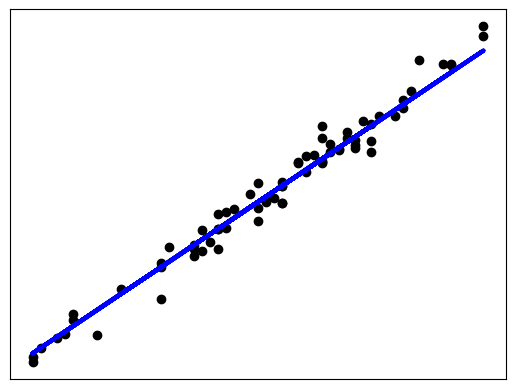

In [36]:
#8)Mostrar grafico final

# Finalmente mostramos el grafico final.
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_sales_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Sales')

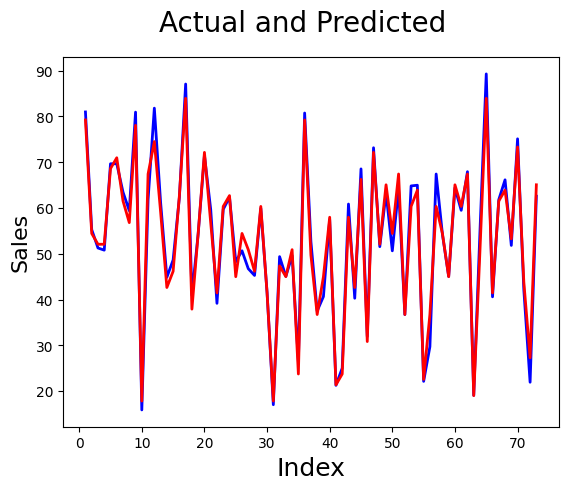

In [35]:
#9)Mostramos la diferencia con el resultado real:

# Actual vs Predicted

#ponemos 41 porque es el tamaño de y_test (siempre hay que tener esto claro.)

c = [i for i in range(1,74,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_sales_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)

In [ ]:
#(OPCIONAL-ADAPTARLO)AQUI PROBAREMOS SI ESTA TECNICA ES RENTABLE PARA ESTA SITUACION SINO NO LA USAMOS.
from sklearn.preprocessing import StandardScaler



# Creamos una instancia del escalador
scaler = StandardScaler()

# Ajustamos el escalador a los datos de temperatura (no necesitamos ajustarlo a la variable dependiente)
X_scaled = scaler.fit_transform(X)

# Mostramos las características escaladas
print("Temperatura original:\n", len(X))
print("\nTemperatura escalada:\n", X_scaled)